# Analise geral dos metadados APAC

Os estágios 0, 1 e 2 são considerados precoces, enquanto que 3 e 4 são consiederados tardios. A recomendação é que 80% dos pacientes sejam diagnosticados ainda nos estágios 0, 1 e 2.

In [43]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings

warnings.simplefilter("ignore")
sns.set_palette('BuGn_r')

In [18]:
data_dir = '../data/'
quimio_name = 'Pulmão Quimioterapia SIA-SUS.csv'
radio_name = 'Pulmão Radioterapia SIA-SUS.csv'
tipo_cancer='pulmão'

usecols_quimio = ['AP_VL_AP', 'AP_UFMUN', 'AP_NUIDADE', 'AP_SEXO', 'AP_RACACOR', 'AP_MUNPCN', 
               'AQ_ESTADI', 'AQ_DTIDEN', 'AQ_DTINTR']

usecols_radio = ['AP_VL_AP', 'AP_UFMUN', 'AP_NUIDADE', 'AP_SEXO', 'AP_RACACOR', 'AP_MUNPCN', 
               'AR_ESTADI', 'AR_DTIDEN', 'AR_DTINTR']

In [28]:
quimio = pd.read_csv(os.path.join(data_dir, quimio_name), encoding='latin', 
                     error_bad_lines=False, low_memory=False, usecols=usecols_quimio)

radio = pd.read_csv(os.path.join(data_dir, radio_name), encoding='latin', 
                    error_bad_lines=False, low_memory=False, usecols=usecols_radio)

### Analise do estadiamento

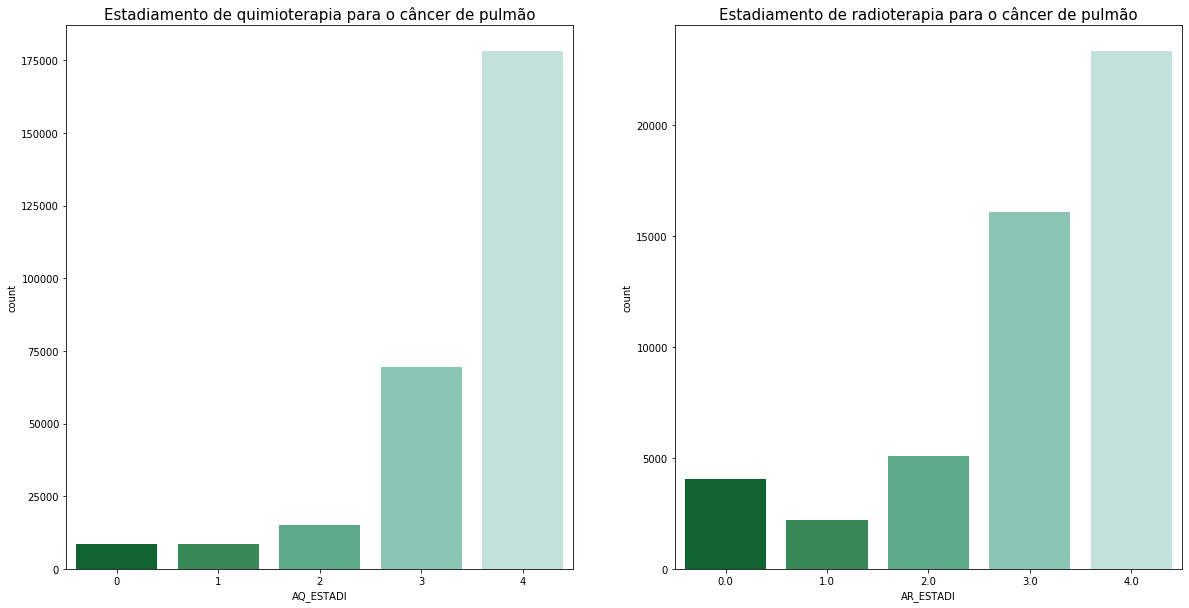

In [29]:
fig, axes = plt.subplots(1, 2, figsize=[20, 10])
sns.countplot(quimio['AQ_ESTADI'], ax=axes[0])
sns.countplot(radio['AR_ESTADI'], ax=axes[1])
axes[0].set_title("Estadiamento de quimioterapia para o câncer de {}".format(tipo_cancer), size=15)
axes[1].set_title("Estadiamento de radioterapia para o câncer de {}".format(tipo_cancer), size=15);

Podemos perceber claramente do plot acima que a quimioterapia tende a ser mais recomendada a pacientes em estado mais tardio.

In [30]:
print("Porcentagem do câncer descoberto em estágio precoce (quimioterapia): {:.2f}%".format(100*(quimio['AQ_ESTADI'] <=2).mean()))
print("Estágio médio que o câncer é descoberto (quimioterapia): {:.2f}".format(quimio['AQ_ESTADI'].mean()))

Porcentagem do câncer descoberto em estágio precoce (quimioterapia): 11.47%
Estágio médio que o câncer é descoberto (quimioterapia): 3.43


In [31]:
print("Porcentagem do câncer descoberto em estágio precoce (radioterapia): {:.2f}%".format(100*(radio['AR_ESTADI'] <=2).mean()))
print("Estágio médio que o câncer é descoberto (radioterapia): {:.2f}".format(radio['AR_ESTADI'].mean()))

Porcentagem do câncer descoberto em estágio precoce (radioterapia): 22.32%
Estágio médio que o câncer é descoberto (radioterapia): 3.03


### Analise do valor das APACs

In [33]:
quimio['AP_VL_AP'].describe()

count    279825.000000
mean        925.943999
std         459.896032
min           0.000000
25%        1100.000000
50%        1100.000000
75%        1100.000000
max        2571.000000
Name: AP_VL_AP, dtype: float64

Nota-se que a grande maioria dos valores para a quimioterapia é de R$1100

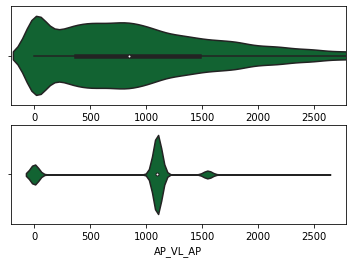

In [55]:
fig, axes = plt.subplots(2, 1)
sns.violinplot(radio[np.abs(scipy.stats.zscore(radio['AP_VL_AP']))<3]['AP_VL_AP'], ax=axes[0])
sns.violinplot(quimio['AP_VL_AP'], ax=axes[1])
axes[0].set_xlim(plt.xlim());